#  Data Visualization 

## Assignment 2




### Exploratory Data Analysis 




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option("display.max_columns", 50)


### Load the dataset



In [3]:
file_path = "database_filled1 anonymised.xlsx"
df = pd.read_excel(file_path)

print("Shape of dataset (rows, columns):", df.shape)
display(df.head())

df.info()


Shape of dataset (rows, columns): (256, 16)


,Games,Game Prestige Score,Group1,Group2,Group3,Group4,Total Medals,PK,IND,IR,CN,UK,GER,AUS,CAN,USA
0,a1,0.286795,531,158,167,55,1170,0,3,0,49,56,41,9,14,379
1,a2,0.269297,2337,723,256,372,5291,0,8,0,613,117,288,10,258,1484
2,a3,0.267893,1161,392,243,97,2705,1,16,1,110,92,43,23,130,1202
3,a4,0.263658,3072,802,299,632,6996,2,45,13,422,43,133,8,132,2062
4,a5,0.263393,273,72,37,22,616,0,9,0,42,59,29,9,20,196


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Games                256 non-null    object 
 1   Game Prestige Score  256 non-null    float64
 2   Group1               256 non-null    object 
 3   Group2               256 non-null    int64  
 4   Group3               256 non-null    int64  
 5   Group4               256 non-null    int64  
 6   Total Medals         256 non-null    int64  
 7   PK                   256 non-null    int64  
 8   IND                  256 non-null    int64  
 9   IR                   256 non-null    int64  
 10  CN                   256 non-null    int64  
 11  UK                   256 non-null    int64  
 12  GER                  256 non-null    int64  
 13  AUS                  256 non-null    int64  
 14  CAN                  256 non-null    int64  
 15  USA                  256 non-null    int

### Dataset description and working notes


- Each row is a game (`a1` to `a256`) with a `Game Prestige Score` showing how important it is.
- Columns `Group1` to `Group4` list gold medals earned by each group of countries.
- `Total Medals` is the gold medal supply for that game.
- Country columns (`PK`, `IND`, `IR`, `CN`, `UK`, `GER`, `AUS`, `CAN`, `USA`) show medals per country.



### Basic descriptive statistics




In [4]:
display(df.describe().T)

print("\nMissing values per column:")
print(df.isna().sum())


,count,mean,std,min,25%,50%,75%,max
Game Prestige Score,256.0,0.105564,0.060972,0.005859,0.060014,0.094483,0.137734,0.286795
Group2,256.0,445.015625,632.390696,2.000000,104.500000,212.000000,571.000000,4433.000000
Group3,256.0,251.859375,379.339855,2.000000,62.750000,134.500000,287.000000,3163.000000
Group4,256.0,462.242188,1066.606242,1.000000,66.000000,158.500000,455.000000,10933.000000
Total Medals,256.0,5341.414062,10402.144618,31.000000,1169.750000,2321.000000,5841.250000,106030.000000
PK,256.0,35.582031,196.631219,0.000000,1.000000,5.000000,17.000000,2962.000000
IND,256.0,196.441406,532.098233,0.000000,14.000000,46.500000,167.250000,4526.000000
IR,256.0,77.593750,162.654328,0.000000,3.000000,19.000000,72.000000,1082.000000
CN,256.0,1514.882812,4025.600327,0.000000,100.750000,362.500000,1294.500000,39508.000000
UK,256.0,155.312500,230.317590,0.000000,39.000000,82.500000,182.250000,1947.000000



Missing values per column:
Games                  0
Game Prestige Score    0
Group1                 0
Group2                 0
Group3                 0
Group4                 0
Total Medals           0
PK                     0
IND                    0
IR                     0
CN                     0
UK                     0
GER                    0
AUS                    0
CAN                    0
USA                    0
dtype: int64


### What the summary tells me

Prestige scores are mostly low, medal counts jump from tiny to large, and missing values are minimal. That means I can move ahead with minor cleaning.


### Derived helpers for later visuals

I set up three helper fields I will reference often:

- `PK_wins`: whether Pakistan got any medal in that game.
- `Prestige_Band`: four quantile-based tiers of the prestige score.
- `PK_eff`: Pakistan’s share of medals whenever it wins.

They keep later plots tidy and easy to explain to local stakeholders.


In [5]:
import numpy as np

group_cols = ['Group1', 'Group2', 'Group3', 'Group4']
country_cols = ['PK', 'IND', 'IR', 'CN', 'UK', 'GER', 'AUS', 'CAN', 'USA']

missing = [c for c in (group_cols + country_cols + ['Game Prestige Score', 'Total Medals']) if c not in df.columns]
if missing:
    raise KeyError(f"Missing expected columns in df: {missing}")

for col in country_cols + ['Total Medals', 'Game Prestige Score']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in group_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df[country_cols] = df[country_cols].fillna(0)

df['PK_wins'] = (df['PK'] > 0).astype(int)

gps = df['Game Prestige Score'].dropna()
if gps.empty:
    df['Prestige_Band'] = pd.NA
else:
    n_unique = gps.nunique()
    bins = 4 if n_unique >= 4 else max(2, n_unique)
    labels = ['Very Low', 'Low', 'High', 'Very High'][:bins]
    try:
        df['Prestige_Band'] = pd.qcut(df['Game Prestige Score'], q=bins, labels=labels, duplicates='drop')
    except ValueError:
        df['Prestige_Band'] = pd.cut(df['Game Prestige Score'], bins=bins, labels=labels)

df['Total_Country_Medals'] = df[country_cols].sum(axis=1)

df['Total_Group_Medals'] = df[group_cols].sum(axis=1)

df['Other_Countries_Total'] = df['Total_Country_Medals'] - df['PK']

df['PK_eff'] = np.where(df['Total Medals'].fillna(0) > 0, df['PK'] / df['Total Medals'], 0)

df['PK_unique'] = ((df['PK'] > 0) & (df['Other_Countries_Total'] == 0)).astype(int)

display(df[['Game Prestige Score', 'PK', 'PK_wins', 'Prestige_Band', 'Total_Country_Medals',
            'Total_Group_Medals', 'Other_Countries_Total', 'PK_eff', 'PK_unique']].head())


,Game Prestige Score,PK,PK_wins,Prestige_Band,Total_Country_Medals,Total_Group_Medals,Other_Countries_Total,PK_eff,PK_unique
0,0.286795,0,0,Very High,551,911.0,551,0.000000,0
1,0.269297,0,0,Very High,2778,3688.0,2778,0.000000,0
2,0.267893,1,1,Very High,1618,1893.0,1617,0.000370,0
3,0.263658,2,1,Very High,2860,4805.0,2858,0.000286,0
4,0.263393,0,0,Very High,364,404.0,364,0.000000,0


### Why these helpers stay in the notebook

`PK_wins` lets me contrast games Pakistan touches vs misses. `Prestige_Band` helps me talk about low vs high prestige without quoting raw numbers every time. `PK_eff` proves if Pakistan dominated a niche game or barely showed up.


### Univariate view (prestige score)



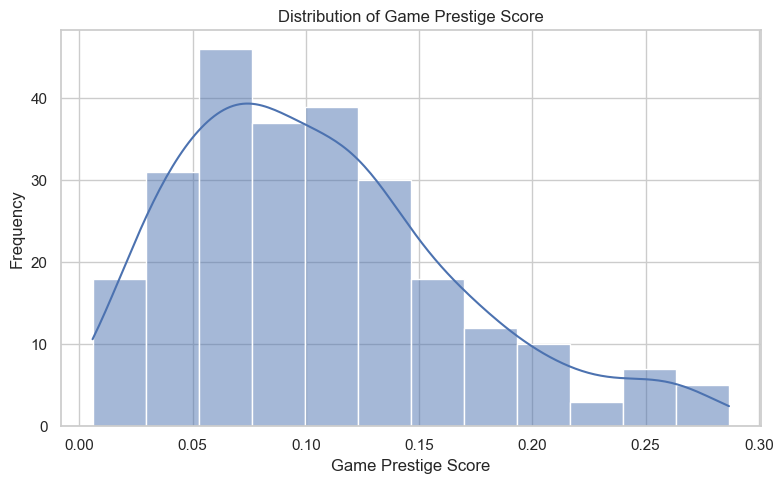

In [6]:
fig, ax = plt.subplots()
sns.histplot(df['Game Prestige Score'], kde=True, ax=ax)
ax.set_title("Distribution of Game Prestige Score")
ax.set_xlabel("Game Prestige Score")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


### Insight: prestige distribution

Most games sit in the low prestige bins while only a few reach the high end.

## Univariate view (total medals)

I plot how many medals each game offers. 


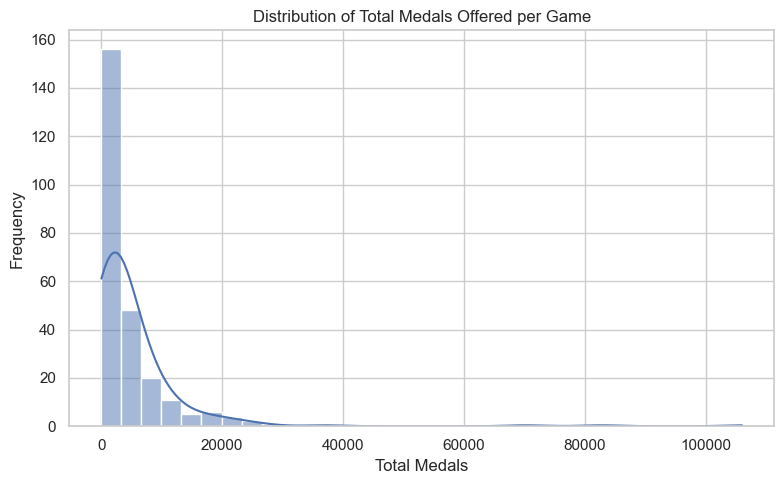

In [7]:
fig, ax = plt.subplots()
sns.histplot(df['Total Medals'], kde=True, ax=ax)
ax.set_title("Distribution of Total Medals Offered per Game")
ax.set_xlabel("Total Medals")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


### Insight: total medal supply

There is a tight cluster of games with tiny medal pools.

### Univariate view (medals by group)

I sum medals for Group1 through Group4 to see who dominates overall.


Total medals by group:


Group1    142934.0
Group4    118334.0
Group2    113924.0
Group3     64476.0
dtype: float64

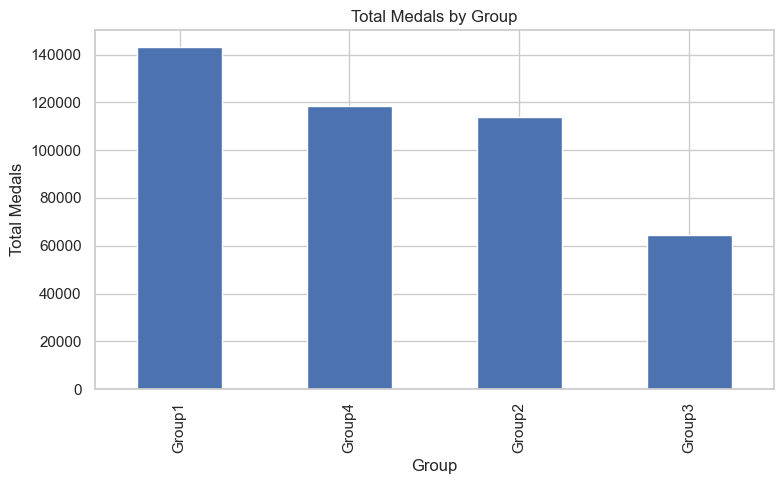

In [8]:
group_totals = df[group_cols].sum().sort_values(ascending=False)
print("Total medals by group:")
display(group_totals)

fig, ax = plt.subplots()
group_totals.plot(kind='bar', ax=ax)
ax.set_title("Total Medals by Group")
ax.set_xlabel("Group")
ax.set_ylabel("Total Medals")
plt.tight_layout()
plt.show()


### Insight: group totals

The bar chart shows group1 collect maximum of medals. Stronger groups are expected to appear in higher prestige bands too.


### Univariate view (medals by country)



Total medals by country:


CN     387810
USA    133119
IND     50289
UK      39760
GER     32544
CAN     29356
AUS     21144
IR      19864
PK       9109
dtype: int64

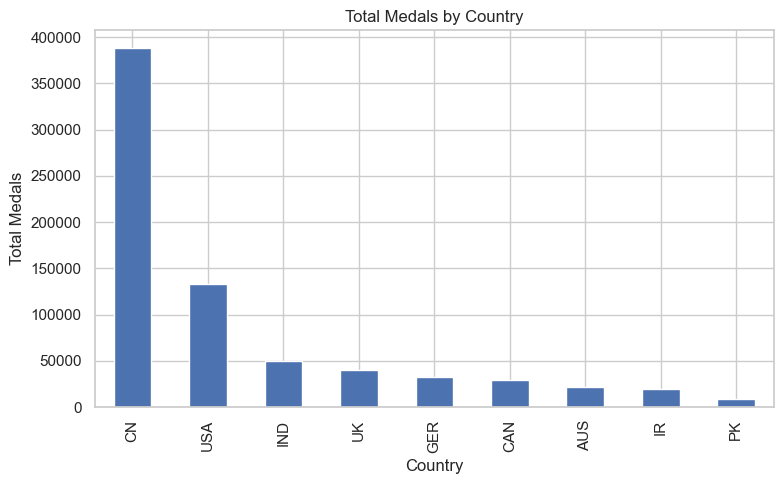

In [9]:
country_totals = df[country_cols].sum().sort_values(ascending=False)
print("Total medals by country:")
display(country_totals)

fig, ax = plt.subplots()
country_totals.plot(kind='bar', ax=ax)
ax.set_title("Total Medals by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Total Medals")
plt.tight_layout()
plt.show()


### Insight (country totals)

CN got most of the medals. Pakistan lies below all of them.


### Prestige vs Pakistan medals




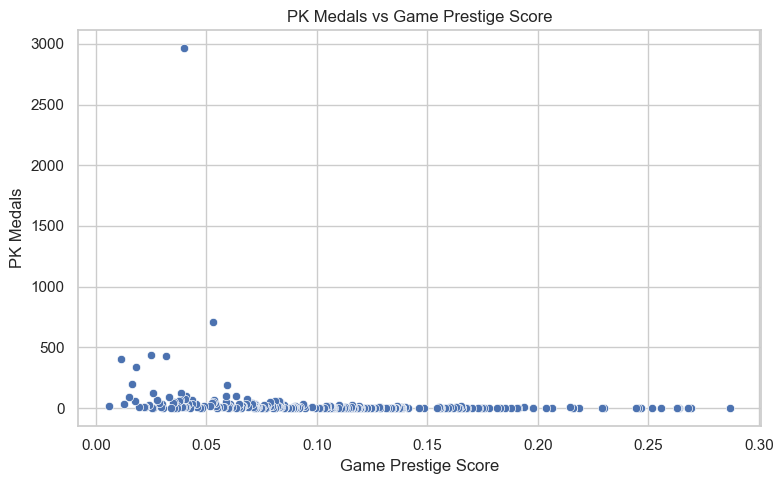

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Game Prestige Score', y='PK', ax=ax)
ax.set_title("PK Medals vs Game Prestige Score")
ax.set_xlabel("Game Prestige Score")
ax.set_ylabel("PK Medals")
plt.tight_layout()
plt.show()


### Insight: prestige vs Pakistan

This plot shows that pakistan mostly get medal in games with low prestige and medals in high prestige games are close to none.


### Prestige vs other countries



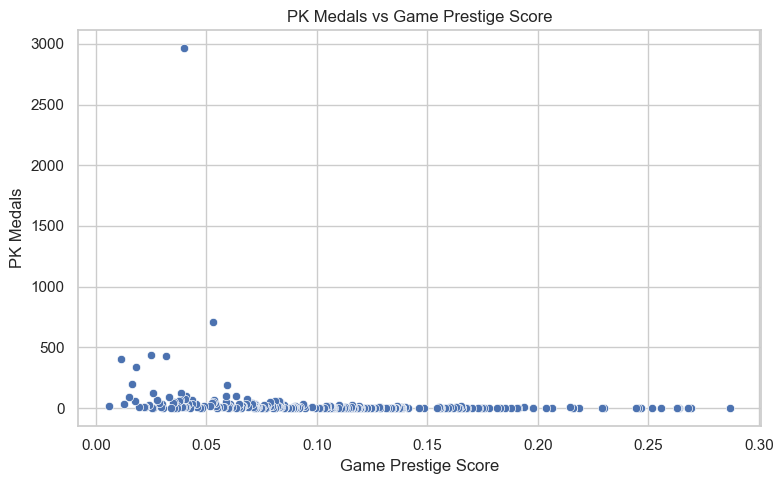

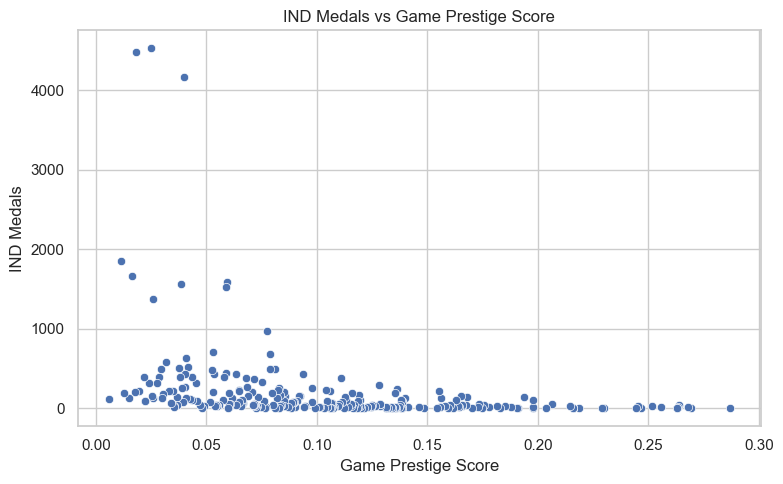

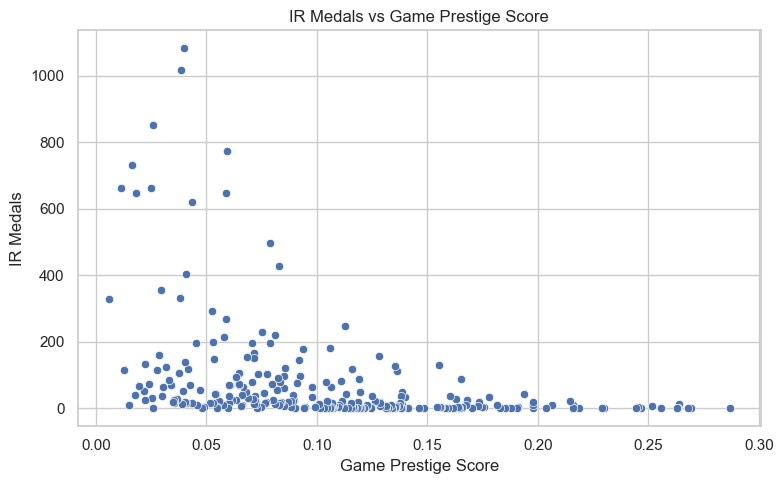

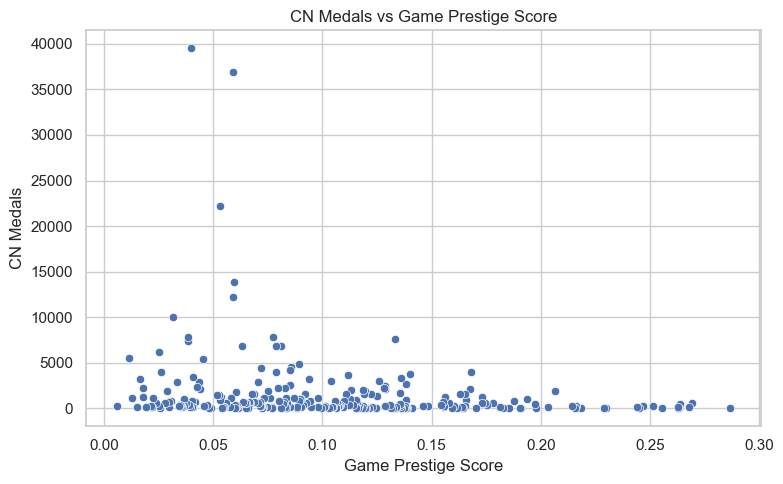

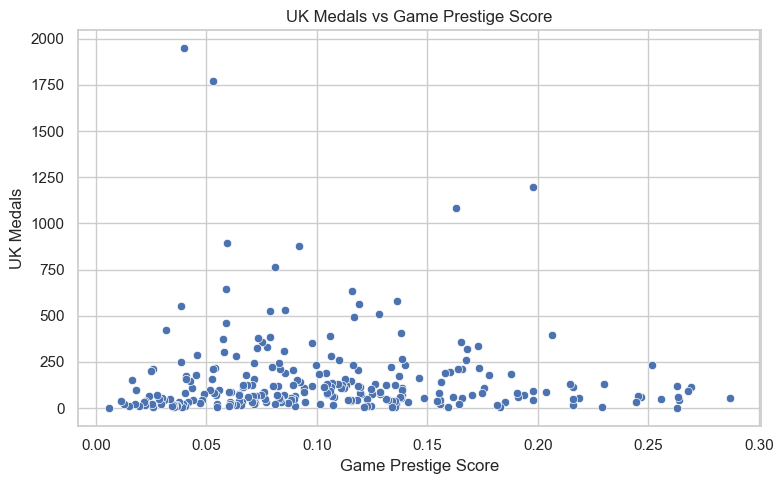

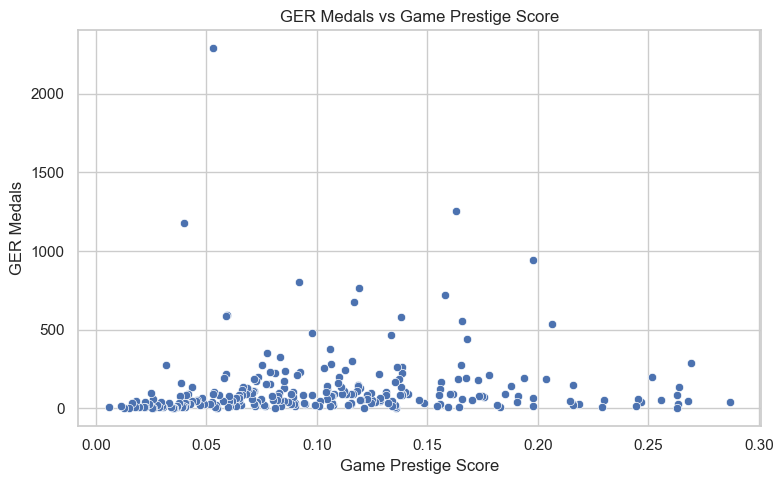

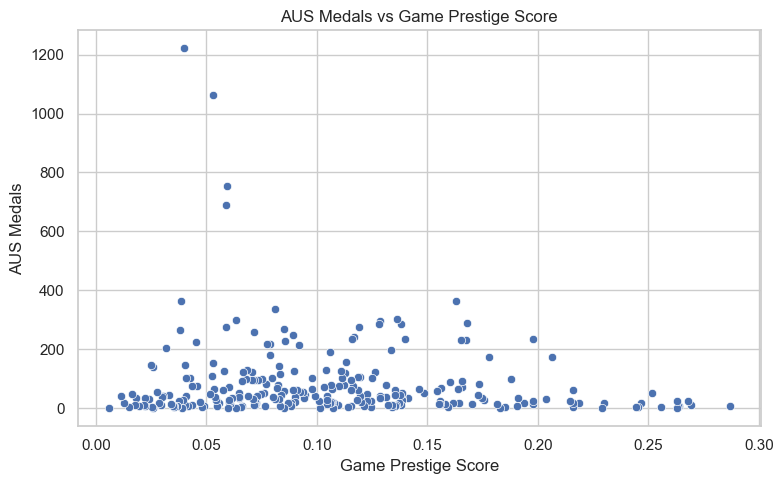

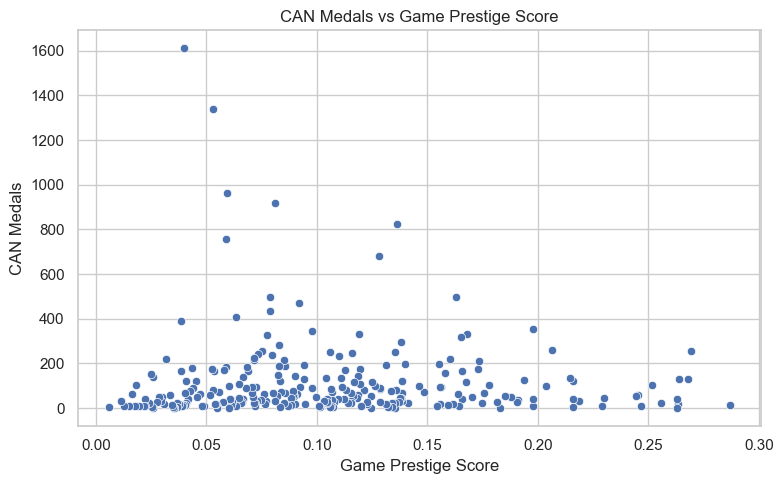

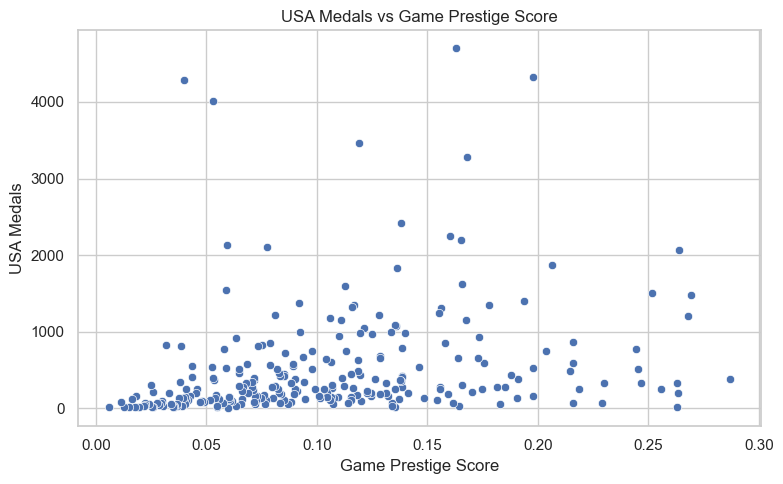

In [11]:
for c in country_cols:
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='Game Prestige Score', y=c, ax=ax)
    ax.set_title(f"{c} Medals vs Game Prestige Score")
    ax.set_xlabel("Game Prestige Score")
    ax.set_ylabel(f"{c} Medals")
    plt.tight_layout()
    plt.show()


### Insight 
These plots describe the medals of various countries in various games.


### Prestige vs group medals



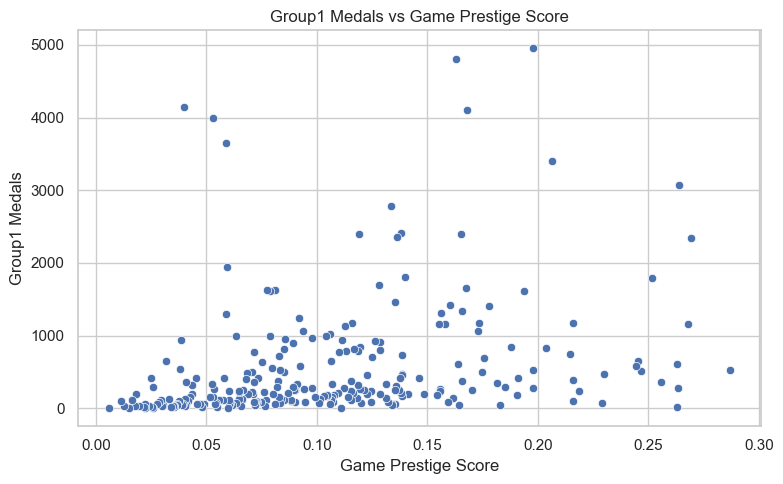

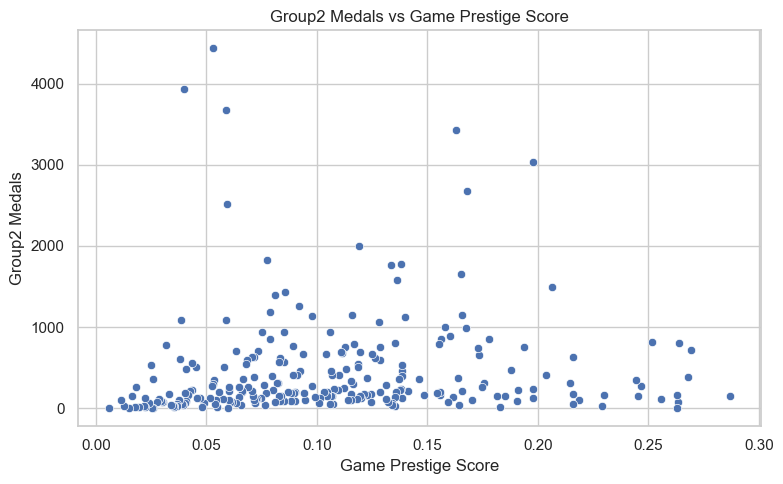

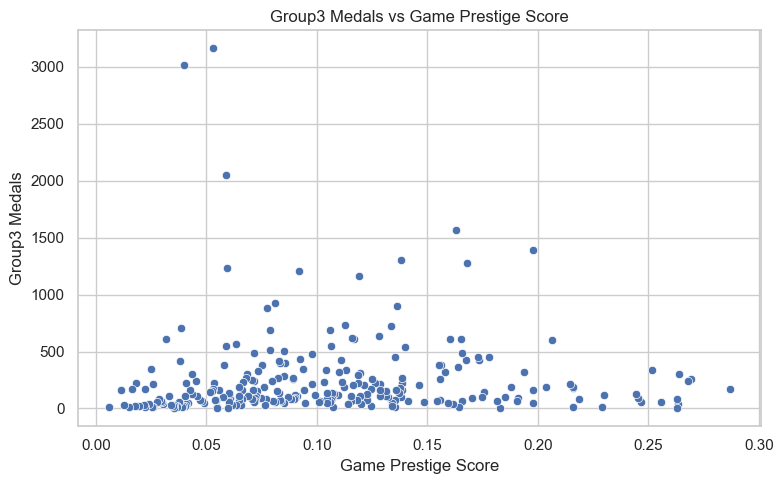

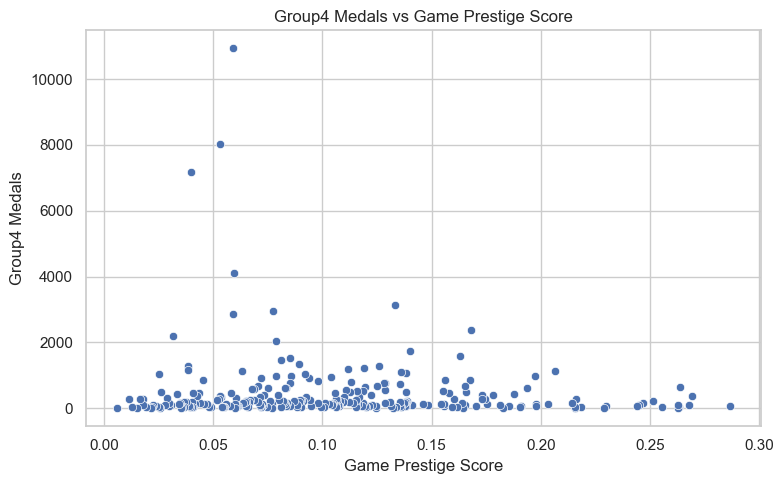

In [12]:
for g in group_cols:
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='Game Prestige Score', y=g, ax=ax)
    ax.set_title(f"{g} Medals vs Game Prestige Score")
    ax.set_xlabel("Game Prestige Score")
    ax.set_ylabel(f"{g} Medals")
    plt.tight_layout()
    plt.show()


### Prestige distribution when Pakistan wins



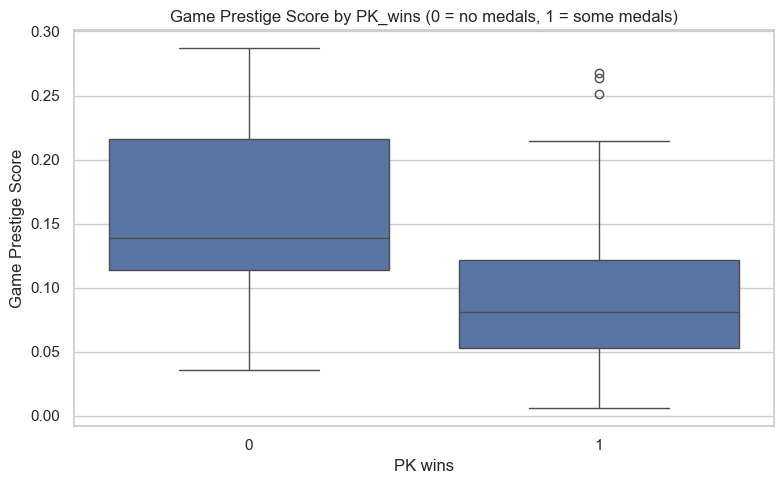

,count,mean,std,min,25%,50%,75%,max
PK_wins,,,,,,,,
0,55.0,0.160181,0.062370,0.035446,0.113804,0.138484,0.215879,0.286795
1,201.0,0.090619,0.051427,0.005859,0.052901,0.081041,0.121306,0.267893


In [13]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='PK_wins', y='Game Prestige Score', ax=ax)
ax.set_title("Game Prestige Score by PK_wins (0 = no medals, 1 = some medals)")
ax.set_xlabel("PK wins")
ax.set_ylabel("Game Prestige Score")
plt.tight_layout()
plt.show()

display(df.groupby('PK_wins')['Game Prestige Score'].describe())


### Insight (PK wins vs prestige)

This box plot display the distribution of prestige and pakistan success in this which shows that pakistan wins when game prestige is low. 


### Total medals vs Pakistan wins




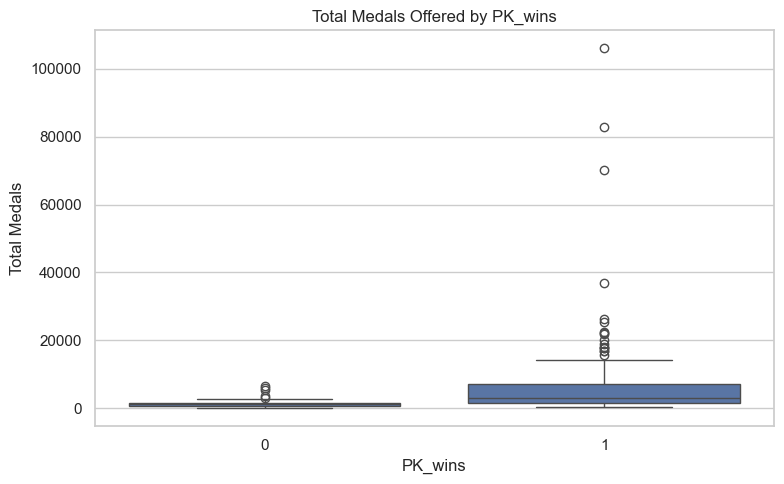

,count,mean,std,min,25%,50%,75%,max
PK_wins,,,,,,,,
0,55.0,1413.290909,1307.197365,31.0,634.5,1112.0,1587.0,6538.0
1,201.0,6416.273632,11493.264255,234.0,1473.0,3015.0,7115.0,106030.0


In [14]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='PK_wins', y='Total Medals', ax=ax)
ax.set_title("Total Medals Offered by PK_wins")
ax.set_xlabel("PK_wins")
ax.set_ylabel("Total Medals")
plt.tight_layout()
plt.show()

display(df.groupby('PK_wins')['Total Medals'].describe())


### Insight (medal supply vs PK wins)

This display that pakistan success rate in events when number of medals offered in that event. This shows that pakistan wins medal when number of offered medals are low. When number of medals are tougher coutries participate and pakistan win rate is very low in that case.


### Country medals across prestige bands



Country medals by Prestige Band:


/tmp/ipykernel_622521/165955275.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt_countries = df.pivot_table(index='Prestige_Band', values=country_cols, aggfunc='sum')


,AUS,CAN,CN,GER,IND,IR,PK,UK,USA
Prestige_Band,,,,,,,,,
Very Low,7169,8268,212260,7229,34872,12522,7542,11357,21899
Low,5307,8325,90869,6898,9457,4809,1153,9692,24116
High,4824,6363,52248,8207,3762,1814,274,9214,33761
Very High,3844,6400,32433,10210,2198,719,140,9497,53343


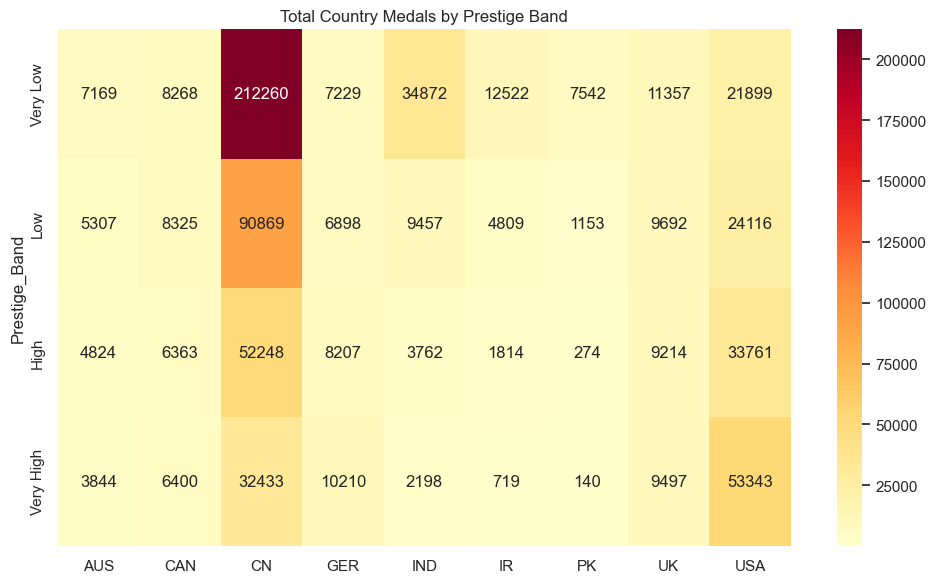

In [15]:
pt_countries = df.pivot_table(index='Prestige_Band', values=country_cols, aggfunc='sum')
print("Country medals by Prestige Band:")
display(pt_countries)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pt_countries, annot=True, fmt=".0f", cmap="YlOrRd", ax=ax)
ax.set_title("Total Country Medals by Prestige Band")
plt.tight_layout()
plt.show()


### Insight (country heatmap)

This heat map displays that pakistan performs well only in low prestige games. Whereas some countries like USA adn CAN performs well across all prestige of games.

### Group medals across prestige bands



Group medals by Prestige Band:


/tmp/ipykernel_622521/186669881.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt_groups = df.pivot_table(index='Prestige_Band', values=group_cols, aggfunc='sum')


,Group1,Group2,Group3,Group4
Prestige_Band,,,,
Very Low,23037.0,25773,16887,47591
Low,24693.0,25511,14839,27005
High,32981.0,26799,15168,23034
Very High,62223.0,35841,17582,20704


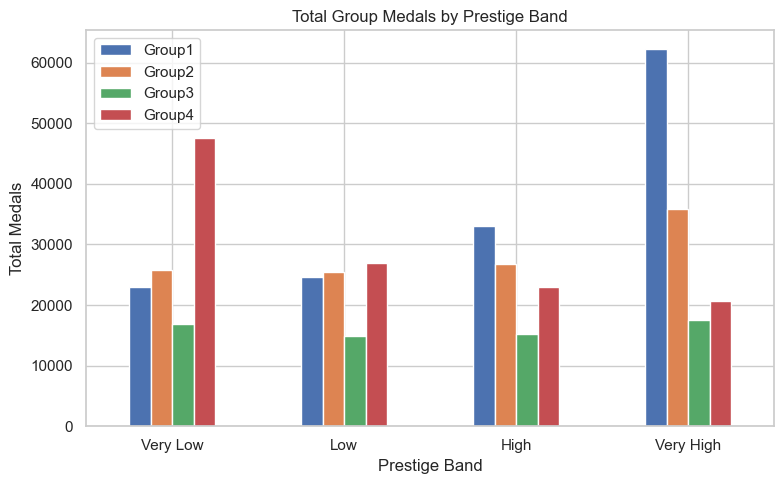

In [16]:
pt_groups = df.pivot_table(index='Prestige_Band', values=group_cols, aggfunc='sum')
print("Group medals by Prestige Band:")
display(pt_groups)

fig, ax = plt.subplots(figsize=(8, 5))
pt_groups.plot(kind='bar', ax=ax)
ax.set_title("Total Group Medals by Prestige Band")
ax.set_xlabel("Prestige Band")
ax.set_ylabel("Total Medals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Insight 

This graph displays the number of medals wins by various groups when prestige of games is changing.

### Pakistan vs Group1



PK and Group1 medals by Prestige Band:


/tmp/ipykernel_622521/1123685956.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pk_group1_band = df.pivot_table(index='Prestige_Band', values=['PK', 'Group1'], aggfunc='sum')


,Group1,PK
Prestige_Band,,
Very Low,23037.0,7542
Low,24693.0,1153
High,32981.0,274
Very High,62223.0,140


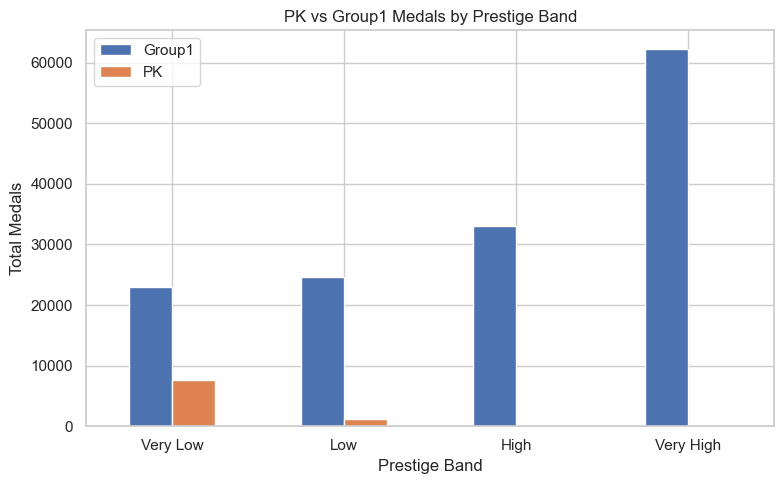

In [17]:
pk_group1_band = df.pivot_table(index='Prestige_Band', values=['PK', 'Group1'], aggfunc='sum')
print("PK and Group1 medals by Prestige Band:")
display(pk_group1_band)

fig, ax = plt.subplots()
pk_group1_band.plot(kind='bar', ax=ax)
ax.set_title("PK vs Group1 Medals by Prestige Band")
ax.set_xlabel("Prestige Band")
ax.set_ylabel("Total Medals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Insight (Pakistan vs Group1)

Group1 keeps winning medals in every band, while Pakistan vanishes once prestige rises.

### Correlation check



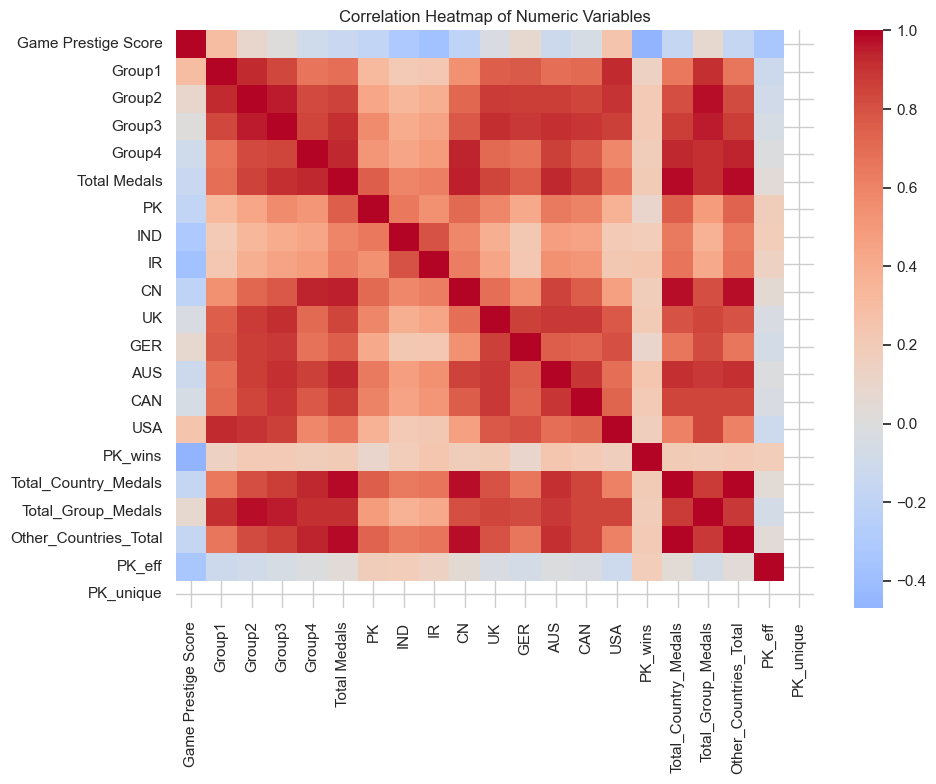

Correlation of PK with other numeric variables:


PK                       1.000000
Total Medals             0.751003
Total_Country_Medals     0.750707
Other_Countries_Total    0.734705
CN                       0.710967
IND                      0.653346
AUS                      0.642623
CAN                      0.604405
UK                       0.586988
Group3                   0.567877
IR                       0.542837
Group4                   0.523405
Total_Group_Medals       0.484818
Group2                   0.435243
GER                      0.418063
USA                      0.369414
Group1                   0.314264
PK_eff                   0.177780
PK_wins                  0.094844
Game Prestige Score     -0.178077
PK_unique                     NaN
Name: PK, dtype: float64

In [18]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, ax=ax)
ax.set_title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

print("Correlation of PK with other numeric variables:")
display(corr['PK'].sort_values(ascending=False))


### Insight (correlation matrix)

Pakistan’s medal count has a small negative link with prestige, echoing the earlier visuals. Other nations show neutral or positive links.


### Games where only Pakistan succeeds

I filter games where Pakistan won medals and none of the other nine coutries did.


In [19]:
pk_unique_games = df[df['PK_unique'] == 1]

print("Number of games where PK has unique medals:", pk_unique_games.shape[0])
display(pk_unique_games[['Games', 'Game Prestige Score', 'Total Medals', 'PK', 'Other_Countries_Total']].head())

print("\nPrestige statistics for PK_unique games:")
display(pk_unique_games['Game Prestige Score'].describe())


Number of games where PK has unique medals: 0


,Games,Game Prestige Score,Total Medals,PK,Other_Countries_Total



Prestige statistics for PK_unique games:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Game Prestige Score, dtype: float64

### Insight (Pakistan-only games)

These rare wins sit at the very bottom of prestige, which suggests Pakistan shines only when others show little interest.


### Pakistan’s efficiency

I chart `PK_eff` to see how big a share Pakistan captures whenever it wins.


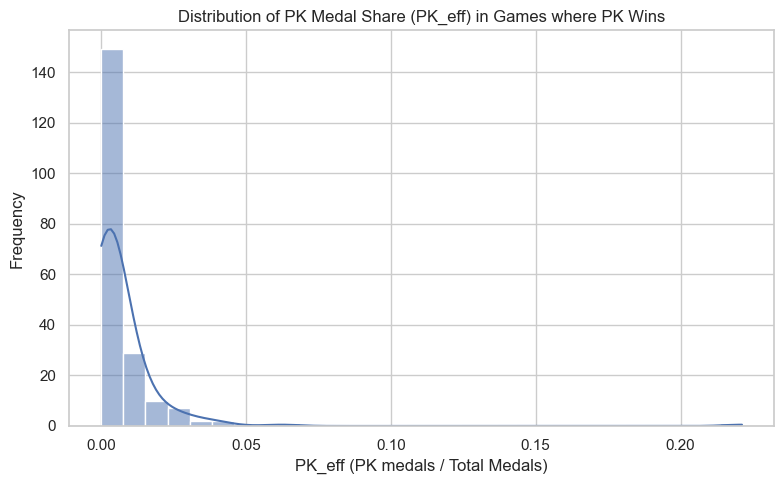

Summary statistics of PK_eff for games where PK wins:


count    201.000000
mean       0.007240
std        0.017506
min        0.000106
25%        0.001013
50%        0.002789
75%        0.007959
max        0.221198
Name: PK_eff, dtype: float64

In [20]:
pk_positive = df[df['PK'] > 0]

fig, ax = plt.subplots()
sns.histplot(pk_positive['PK_eff'], kde=True, ax=ax)
ax.set_title("Distribution of PK Medal Share (PK_eff) in Games where PK Wins")
ax.set_xlabel("PK_eff (PK medals / Total Medals)")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Summary statistics of PK_eff for games where PK wins:")
display(pk_positive['PK_eff'].describe())


### Insight (efficiency view)

Pakistan wins most of the medals, but always in the lowest prestige. Pakistan performs bad as prestige increases.

### Other countries when Pakistan wins

I compare how many medals other countries and groups earn in games where Pakistan wins versus games where it does not.


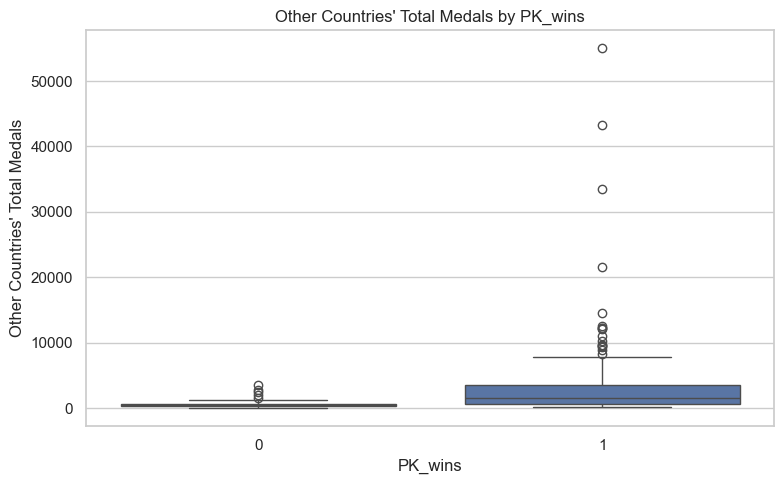

,count,mean,std,min,25%,50%,75%,max
PK_wins,,,,,,,,
0,55.0,677.854545,666.282985,16.0,313.5,528.0,710.0,3542.0
1,201.0,3366.189055,5999.525813,120.0,694.0,1520.0,3611.0,54995.0


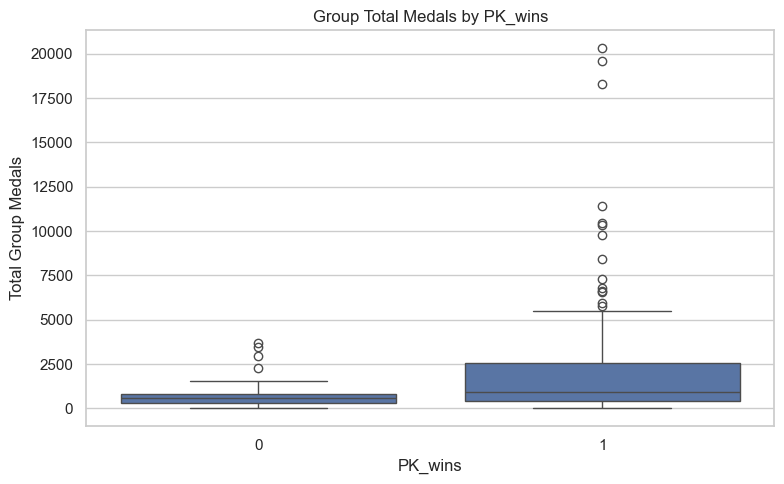

,count,mean,std,min,25%,50%,75%,max
PK_wins,,,,,,,,
0,55.0,726.363636,760.763782,21.0,308.0,573.0,810.0,3688.0
1,201.0,1988.646766,2959.813567,28.0,411.0,910.0,2543.0,20307.0


In [21]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='PK_wins', y='Other_Countries_Total', ax=ax)
ax.set_title("Other Countries' Total Medals by PK_wins")
ax.set_xlabel("PK_wins")
ax.set_ylabel("Other Countries' Total Medals")
plt.tight_layout()
plt.show()

display(df.groupby('PK_wins')['Other_Countries_Total'].describe())

fig, ax = plt.subplots()
sns.boxplot(data=df, x='PK_wins', y='Total_Group_Medals', ax=ax)
ax.set_title("Group Total Medals by PK_wins")
ax.set_xlabel("PK_wins")
ax.set_ylabel("Total Group Medals")
plt.tight_layout()
plt.show()

display(df.groupby('PK_wins')['Total_Group_Medals'].describe())


### Insight (Pakistan vs everyone else)

When Pakistan wins, other nations usually collect fewer medals. This meas pakistan wins model when competition is very low.


### Exploratory Data Analysis summary


Pakistan wins only in low prestige games, when number of medal offered are low. Big nation win everywhere and pakistan efficiecncy spikes only in low prestige game i.e rivals stay away. 

# Explanatory Data Analysis



/tmp/ipykernel_622521/2659130156.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_pk = df.pivot_table(


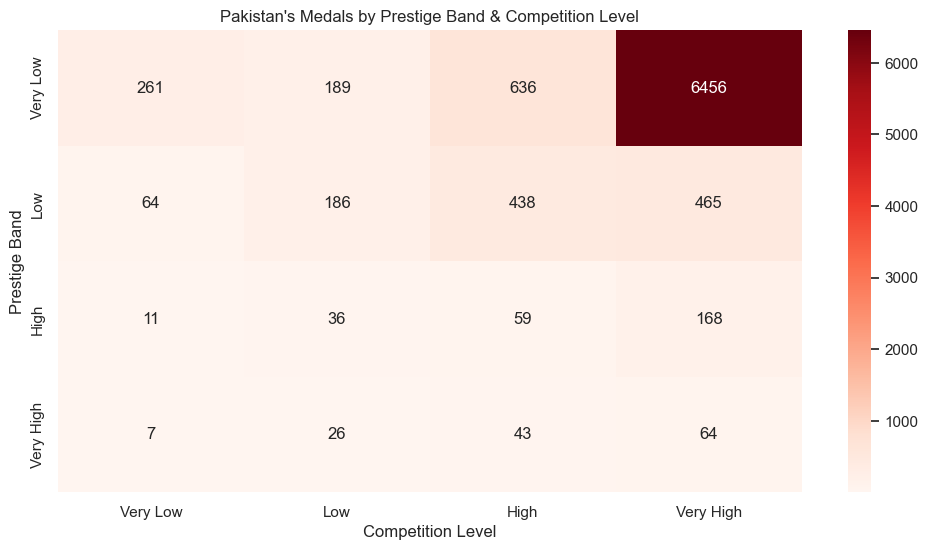

In [24]:
pivot_pk = df.pivot_table(
    index='Prestige_Band',
    columns='Competition_Level',
    values='PK',
    aggfunc='sum'
).loc[['Very Low','Low','High','Very High']]

plt.figure(figsize=(12,6))
sns.heatmap(pivot_pk, annot=True, fmt=".0f", cmap="Reds")
plt.title("Pakistan's Medals by Prestige Band & Competition Level")
plt.ylabel("Prestige Band")
plt.xlabel("Competition Level")
plt.show()


### Insight (prestige plus competition)

The cross-view of prestige and competition shows Pakistan winning only where both are “Very Low.” Higher prestige wipes Pakistan out even if competition is moderate.


/tmp/ipykernel_622521/3124510588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Prestige_Band', y='PK_eff',


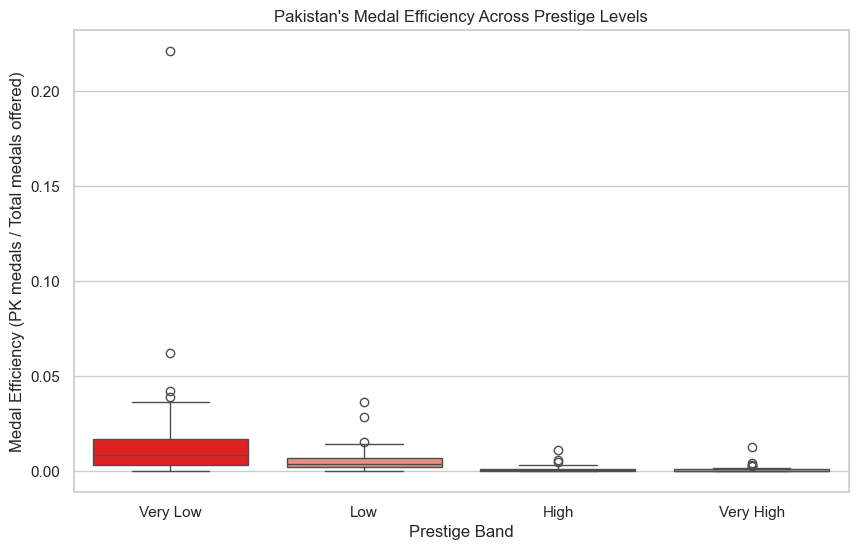

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Prestige_Band', y='PK_eff',
            palette=['red','salmon','grey','lightgrey'])

plt.title("Pakistan's Medal Efficiency Across Prestige Levels")
plt.xlabel("Prestige Band")
plt.ylabel("Medal Efficiency (PK medals / Total medals offered)")
plt.show()


### Insight (medal efficiency by prestige)

Pakistan’s share of medals is healthy only in the lowest prestige tier. Efficiency collapses as soon as the games become respected.


/tmp/ipykernel_622521/2664321950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prestige_top = df.groupby('Prestige_Band')[['CN','USA']].sum()


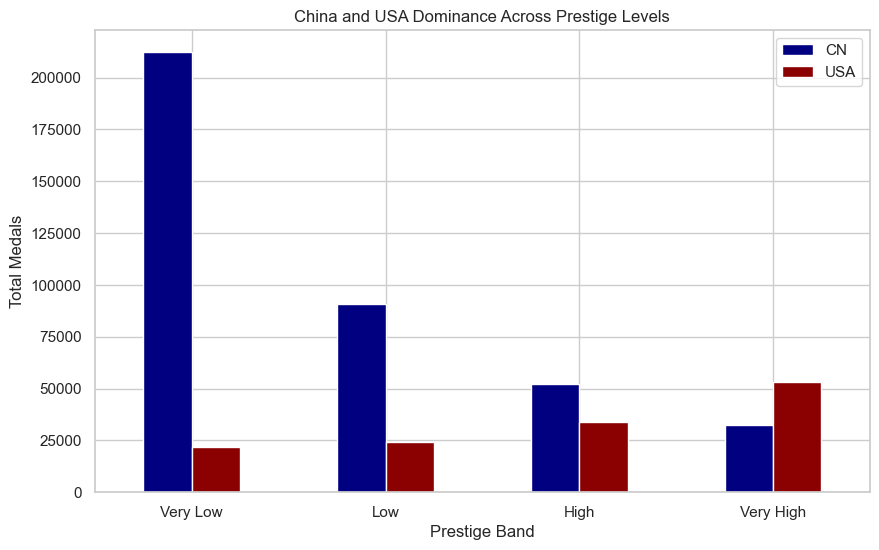

In [26]:
prestige_top = df.groupby('Prestige_Band')[['CN','USA']].sum()

prestige_top.loc[['Very Low','Low','High','Very High']].plot(kind='bar', figsize=(10,6),
                                                            color=['navy','darkred'])

plt.title("China and USA Dominance Across Prestige Levels")
plt.xlabel("Prestige Band")
plt.ylabel("Total Medals")
plt.xticks(rotation=0)
plt.show()


### Insight (medals domination)

China and the USA gather more medals as prestige hikes. Their dominance explains why Pakistan cannot break into higher-prestige events.


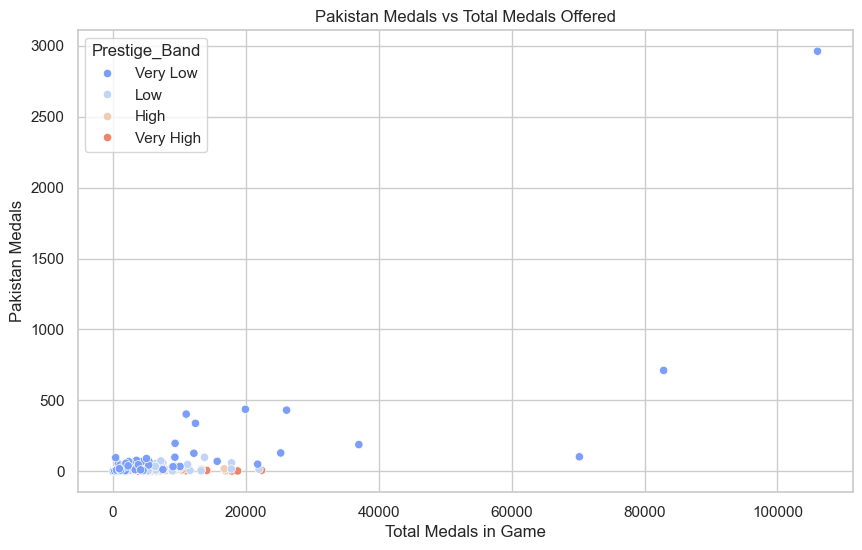

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total Medals', y='PK', hue='Prestige_Band',
                palette='coolwarm')

plt.title("Pakistan Medals vs Total Medals Offered")
plt.xlabel("Total Medals in Game")
plt.ylabel("Pakistan Medals")
plt.show()


### Insight (medal pool size)

Pakistan prefers games with small medal pools. Larger pools come with higher prestige and tougher rivals, so Pakistan stays away.


### Final narrative

Pakistan’s medal strategy seems to be: choose low-prestige games where competition and medal supply are low, and stay out when giants like China or the USA show up.